In [1]:
%env DISPLAY=:0.0
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=16
%env MKL_NUM_THREADS=1
%env NUMEXPR_NUM_THREADS=1

env: DISPLAY=:0.0
env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=16
env: MKL_NUM_THREADS=1
env: NUMEXPR_NUM_THREADS=1


In [1]:
from cosmogrb.universe.survey import Survey
import zusammen
import arviz
import numpy as np
from cmdstanpy import cmdstan_path, CmdStanModel
import cmdstanpy
import os
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

/Users/fran/.virtualenvs/grb/lib/python3.8/site-packages/threeML/__init__.py:12: UserWarning: No DISPLAY variable set. Using backend for graphics without display (Agg)
  warnings.warn(
/Users/fran/.virtualenvs/grb/lib/python3.8/site-packages/astromodels/functions/function.py:140: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  function_definition = my_yaml.load(dct['__doc__'])
/Users/fran/.virtualenvs/grb/lib/python3.8/site-packages/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of xc to 1e-99 because there was a postive transform
  warnings.warn('We have set the min_value of %s to 1e-99 because there was a postive transform' % self.path)
2020-11-17 16:05:26 Francescas-MacBook-Pro.local numexpr.utils[58871] INFO Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-11-17 16:05:26 Francescas-MacBook

Configuration read from /Users/fran/.threeML/threeML_config.yml



WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



## cosmogrb -> Stan

In [2]:
from zusammen.utils.sim2fits import AnalysisBuilder

SynthGRB_0


2020-11-17 16:05:31 Francescas-MacBook-Pro.local astropy[58871] WARNING VerifyWarning: Card is too long, comment will be truncated.
2020-11-17 16:05:31 Francescas-MacBook-Pro.local astropy[58871] WARNING AstropyDeprecationWarning: "clobber" was deprecated in version 2.0 and will be removed in a future version. Use argument "overwrite" instead.

WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_n6.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'




WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_n7.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.536451816558838)




WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_n8.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.910734176635742)




WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_b1.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'




WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.536451816558838)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.910734176635742)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.536451816558838)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.910734176635742)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.536451816558838)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.910734176635742)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.536451816558

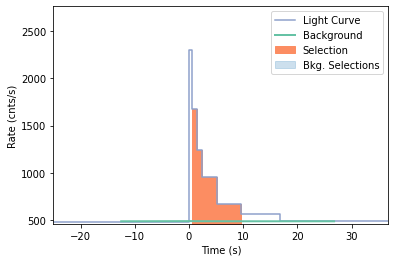

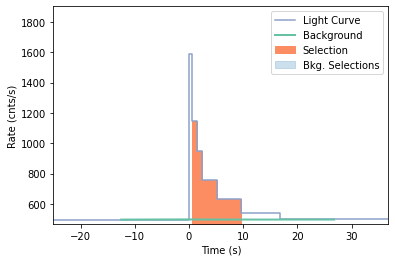

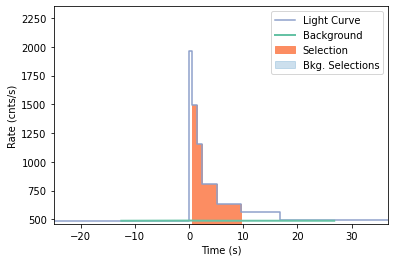

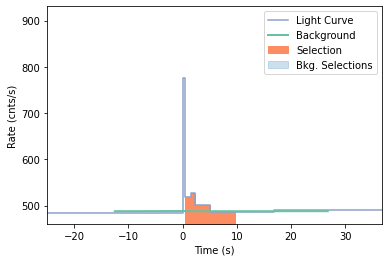

In [3]:
analysis_builder = AnalysisBuilder("data/survey.h5", use_bb=True)
output = zusammen.DataSet.from_dict(analysis_builder.yaml_params)
output.to_hdf5_file("data/test_grb_proc.h5")

## Fit

In [9]:
ds = zusammen.DataSet.from_hdf5_file('data/test_grb_proc.h5')

In [10]:
data = ds.to_stan_dict()
#N_gen_spectra = 100
#model_energy = np.logspace(0,5,N_gen_spectra)
#data['N_gen_spectra'] = N_gen_spectra
#data['model_energy'] = model_energy

warmup = 500
samps = 250

total = warmup + samps

chains = 4

In [11]:
cmdstanpy.utils.jsondump("test_data.json", data)

In [12]:
model = CmdStanModel(stan_file="stan/just_spectral.stan", 
                     cpp_options={'STAN_THREADS': 'TRUE'})

2020-11-17 16:06:23 Francescas-MacBook-Pro.local cmdstanpy[58871] INFO found newer exe file, not recompiling
2020-11-17 16:06:23 Francescas-MacBook-Pro.local cmdstanpy[58871] INFO compiled model file: /Users/fran/projects/zusammen/examples/stan/just_spectral


In [13]:
os.environ["STAN_NUM_THREADS"] = "8"

fit = model.sample(
    data=data,
    cores=8,
    iter_warmup=warmup,
    iter_sampling=samps,
    chains=chains,
    max_treedepth=10,
    show_progress="notebook",
    seed=16574)

av = arviz.from_cmdstanpy(fit)

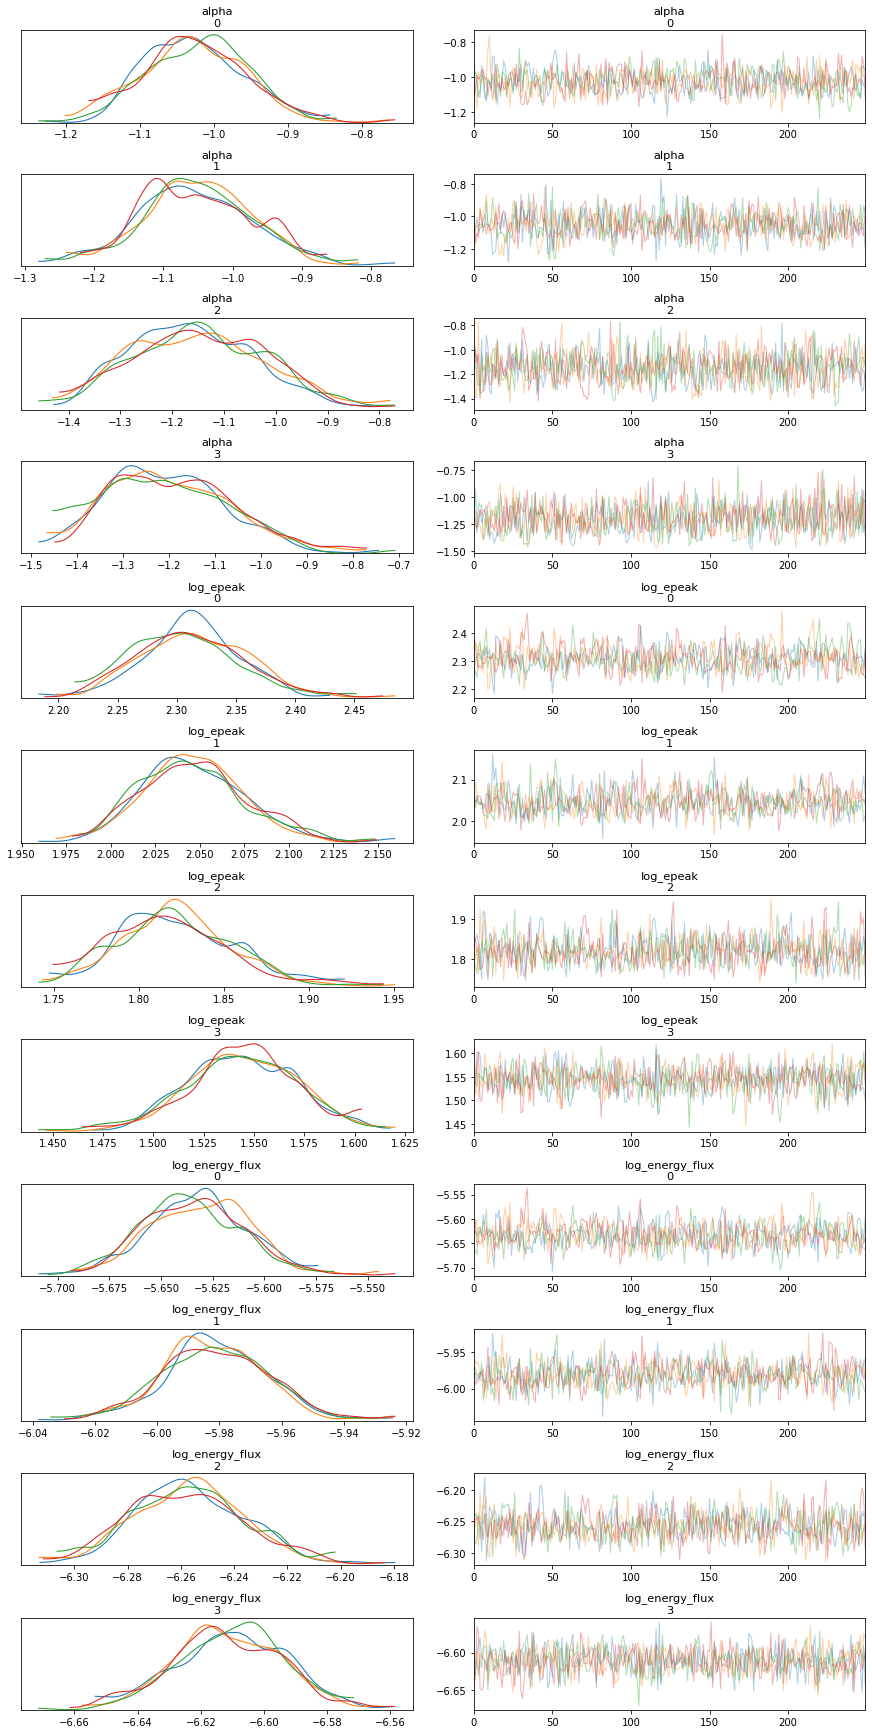

In [14]:
arviz.plot_trace(av, var_names=["alpha", "log_epeak", "log_energy_flux"]);

## Compare with truth

In [48]:
from cosmogrb.universe.survey import Survey
from popsynth.distributions.cosmological_distribution import luminosity_distance

In [78]:
survey = Survey.from_file('data/survey.h5')
grb_reload = survey['SynthGRB_0'].grb

gamma_true = grb_reload._source_params["gamma"]
Nrest = grb_reload._source_params["Nrest"] 
z = grb_reload.z
delta_true = np.log10(Nrest / (4 * np.pi * dl**2))
alpha_true = grb_reload._source_params["alpha"]
ep_start = grb_reload._source_params["ep_start"]

In [79]:
#arviz.plot_pair(av, var_names=["gamma", "delta"], divergences=True);

In [80]:
av.posterior

<xarray.Dataset>
Dimensions:                (alpha_dim_0: 4, chain: 4, draw: 250, log_energy_flux_dim_0: 4, log_epeak_dim_0: 4)
Coordinates:
  * chain                  (chain) int64 0 1 2 3
  * draw                   (draw) int64 0 1 2 3 4 5 ... 244 245 246 247 248 249
  * alpha_dim_0            (alpha_dim_0) int64 0 1 2 3
  * log_epeak_dim_0        (log_epeak_dim_0) int64 0 1 2 3
  * log_energy_flux_dim_0  (log_energy_flux_dim_0) int64 0 1 2 3
Data variables:
    alpha                  (chain, draw, alpha_dim_0) float64 -0.9345 ... -1.355
    log_epeak              (chain, draw, log_epeak_dim_0) float64 2.27 ... 1.533
    log_energy_flux        (chain, draw, log_energy_flux_dim_0) float64 -5.636 ... -6.597
Attributes:
    created_at:                 2020-11-17T15:07:32.852265
    arviz_version:              0.8.3
    inference_library:          cmdstanpy
    inference_library_version:  0.9.5

In [81]:
N_intervals = 4

Text(0, 0.5, 'log_energy_flux')

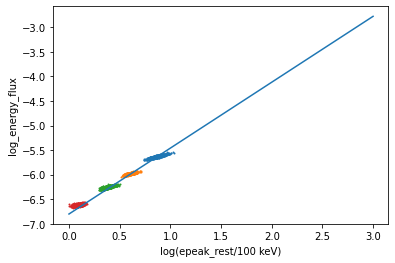

In [82]:
fig, ax = plt.subplots()

for i in range(N_intervals):

    log_epeak_rest = np.log10(10**np.concatenate(av.posterior.log_epeak[:,:,i]) 
                              * (1+z) / 100)
    ax.scatter(log_epeak_rest,
               np.concatenate(av.posterior.log_energy_flux[:,:,i]), s=1)
    
xx = np.linspace(0,3,50)

ax.plot(xx, gamma_true*xx + delta_true)
ax.set_xlabel("log(epeak_rest/100 keV)")
ax.set_ylabel("log_energy_flux")

Text(0.5, 0, 'log_epeak')

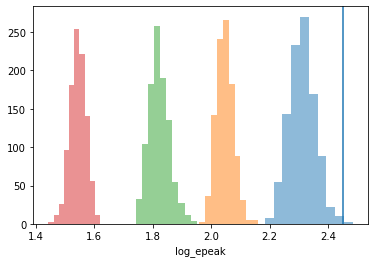

In [85]:
fig, ax = plt.subplots()
for i in range(N_intervals):
    ax.hist(np.concatenate(av.posterior.log_epeak[:,:,i]), alpha=0.5)
ax.axvline(np.log10(ep_start))
ax.set_xlabel("log_epeak")

Text(0, 0.5, 'alpha')

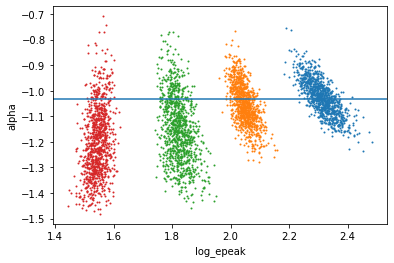

In [90]:
fig, ax = plt.subplots()

for i in range(N_intervals):

    ax.scatter(np.concatenate(av.posterior.log_epeak[:,:,i]),
               np.concatenate(av.posterior.alpha[:,:,i]), s=1)
ax.axhline(alpha_true)
#ax.axvline(np.log10(ep_start))
ax.set_xlabel("log_epeak")
ax.set_ylabel("alpha")

[Text(0, 0.5, 'alpha'), Text(0.5, 0, 'log energy flux')]

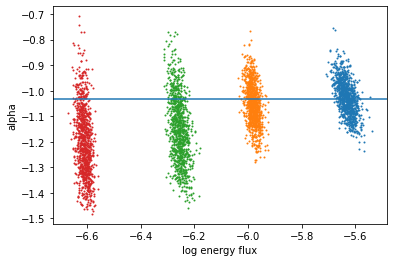

In [91]:
fig, ax = plt.subplots()

for i in range(N_intervals):

    ax.scatter(np.concatenate(av.posterior.log_energy_flux[:,:,i]),
               np.concatenate(av.posterior.alpha[:,:,i]), s=1)
ax.axhline(alpha_true)
ax.set(xlabel="log energy flux", ylabel="alpha")

In [92]:
av.posterior.to_netcdf("output/just_spectral.nc")